# Data examination and pre-processing

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv("eScooterDemand.csv")
data.head()

,Date,Count,Hour,Temp,Humidity,Wind speed,Visibility,Dew point,Sunshine,Rain,Snow,Season,Public Holiday,HireAvailable
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No,Yes


## Addressing the data observations

### Convert "Yes/No" cells to numeric values

In [2]:
data["Public Holiday"] = data["Public Holiday"].apply(lambda x: 1 if x == "Yes" else 0)
data["HireAvailable"] = data["HireAvailable"].apply(lambda x: 1 if x == "Yes" else 0)
data.head()

,Date,Count,Hour,Temp,Humidity,Wind speed,Visibility,Dew point,Sunshine,Rain,Snow,Season,Public Holiday,HireAvailable
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1


### One-hot encode season data

In [3]:
for season in ["Winter", "Autumn", "Spring", "Summer"]:
    data[season] = data["Season"].apply(lambda x: 1 if x == season else 0)
del data["Season"]
data.head()

,Date,Count,Hour,Temp,Humidity,Wind speed,Visibility,Dew point,Sunshine,Rain,Snow,Public Holiday,HireAvailable,Winter,Autumn,Spring,Summer
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,1,0,0,0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,1,0,0,0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,1,0,0,0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,1,0,0,0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,1,0,0,0


### Break date column into day, month and year columns

In [4]:
data["day"] = data["Date"].apply(lambda x: int(x.split("/")[0]))
data["month"] = data["Date"].apply(lambda x: int(x.split("/")[1]))
data["year"] = data["Date"].apply(lambda x: int(x.split("/")[2]))
del data["Date"]
data.head()

,Count,Hour,Temp,Humidity,Wind speed,Visibility,Dew point,Sunshine,Rain,Snow,Public Holiday,HireAvailable,Winter,Autumn,Spring,Summer,day,month,year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,1,0,0,0,1,12,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,1,0,0,0,1,12,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,1,0,0,0,1,12,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,1,0,0,0,1,12,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,1,0,0,0,1,12,2017


### Scale numeric columns
This will keep the range of the data manageable, reducing the need for the algorithm to "balance" data of different scales.

In [5]:
from sklearn.preprocessing import minmax_scale

data[
    [
        "Temp",
        "Humidity",
        "Wind speed",
        "Hour",
        "Visibility",
        "Dew point",
        "Sunshine",
        "Rain",
        "Snow",
        "day",
        "month",
        "year",
    ]
] = minmax_scale(
    data[
        [
            "Temp",
            "Humidity",
            "Wind speed",
            "Hour",
            "Visibility",
            "Dew point",
            "Sunshine",
            "Rain",
            "Snow",
            "day",
            "month",
            "year",
        ]
    ]
)

### Remove rows where the hire scheme is not running
This will also allow for deleting the `HireAvailable` column since it will now be guaranteed to be available

In [6]:
count_when_hire_not_available = data[data["HireAvailable"] == 0]
data_when_available = data.drop(data[data["HireAvailable"] == 0].index)
del data_when_available["HireAvailable"]
data_when_available.head()

,Count,Hour,Temp,Humidity,Wind speed,Visibility,Dew point,Sunshine,Rain,Snow,Public Holiday,Winter,Autumn,Spring,Summer,day,month,year
0,254,0.000000,0.220280,0.377551,0.297297,1.0,0.224913,0.0,0.0,0.0,0,1,0,0,0,0.0,1.0,0.0
1,204,0.043478,0.215035,0.387755,0.108108,1.0,0.224913,0.0,0.0,0.0,0,1,0,0,0,0.0,1.0,0.0
2,173,0.086957,0.206294,0.397959,0.135135,1.0,0.223183,0.0,0.0,0.0,0,1,0,0,0,0.0,1.0,0.0
3,107,0.130435,0.202797,0.408163,0.121622,1.0,0.224913,0.0,0.0,0.0,0,1,0,0,0,0.0,1.0,0.0
4,78,0.173913,0.206294,0.367347,0.310811,1.0,0.207612,0.0,0.0,0.0,0,1,0,0,0,0.0,1.0,0.0


### Final observations
Now that the data is scaled, the range of values of the `Count` column is significantly greater, requiring large weights in individuals.
While not necessarily an issue, converting the data to a lower range may help the individuals keep their representation to a smaller range of values, reducing the search space.
A potential way of reducing the range is applying a natural log to the `Count` column. Given that the maximum in this dataset is 3556, the maximum log value will be around 8, significantly reducing the available range. 
A possible issue may arise with counts of 0 and 1 - the log of 1 is 0 and log of 0 is undefined. A possible solution is to simply not convert counts of zero. While calculating the original value from the converted column could lead to an error of 1, the scale of the original `Count` column makes it possible to argue that an error of one is not significant in the scale of the average number of daily rentals.

For additional confidence in the above, count the number of times when Count was either 0 or 1

In [7]:
count_equal_to_zero = len(data_when_available[data_when_available["Count"] == 0])
count_equal_to_one = len(data_when_available[data_when_available["Count"] == 1])
print(
    f"Count = 0 on {count_equal_to_zero} observations\nCount = 1 on {count_equal_to_one} observations"
)

Count = 0 on 0 observations
Count = 1 on 0 observations


In [8]:
data_when_available["Count"] = data_when_available["Count"].apply(
    lambda x: 0 if x == 0 else np.log(x)
)
data_when_available.head()

,Count,Hour,Temp,Humidity,Wind speed,Visibility,Dew point,Sunshine,Rain,Snow,Public Holiday,Winter,Autumn,Spring,Summer,day,month,year
0,5.537334,0.000000,0.220280,0.377551,0.297297,1.0,0.224913,0.0,0.0,0.0,0,1,0,0,0,0.0,1.0,0.0
1,5.318120,0.043478,0.215035,0.387755,0.108108,1.0,0.224913,0.0,0.0,0.0,0,1,0,0,0,0.0,1.0,0.0
2,5.153292,0.086957,0.206294,0.397959,0.135135,1.0,0.223183,0.0,0.0,0.0,0,1,0,0,0,0.0,1.0,0.0
3,4.672829,0.130435,0.202797,0.408163,0.121622,1.0,0.224913,0.0,0.0,0.0,0,1,0,0,0,0.0,1.0,0.0
4,4.356709,0.173913,0.206294,0.367347,0.310811,1.0,0.207612,0.0,0.0,0.0,0,1,0,0,0,0.0,1.0,0.0


In [9]:
print(
    f"New range for the Count column - min: {data_when_available['Count'].min()}, max: {data_when_available['Count'].max()}"
)

New range for the Count column - min: 0.6931471805599453, max: 8.176391596633795


## Investigating the degree to which other columns affect the count

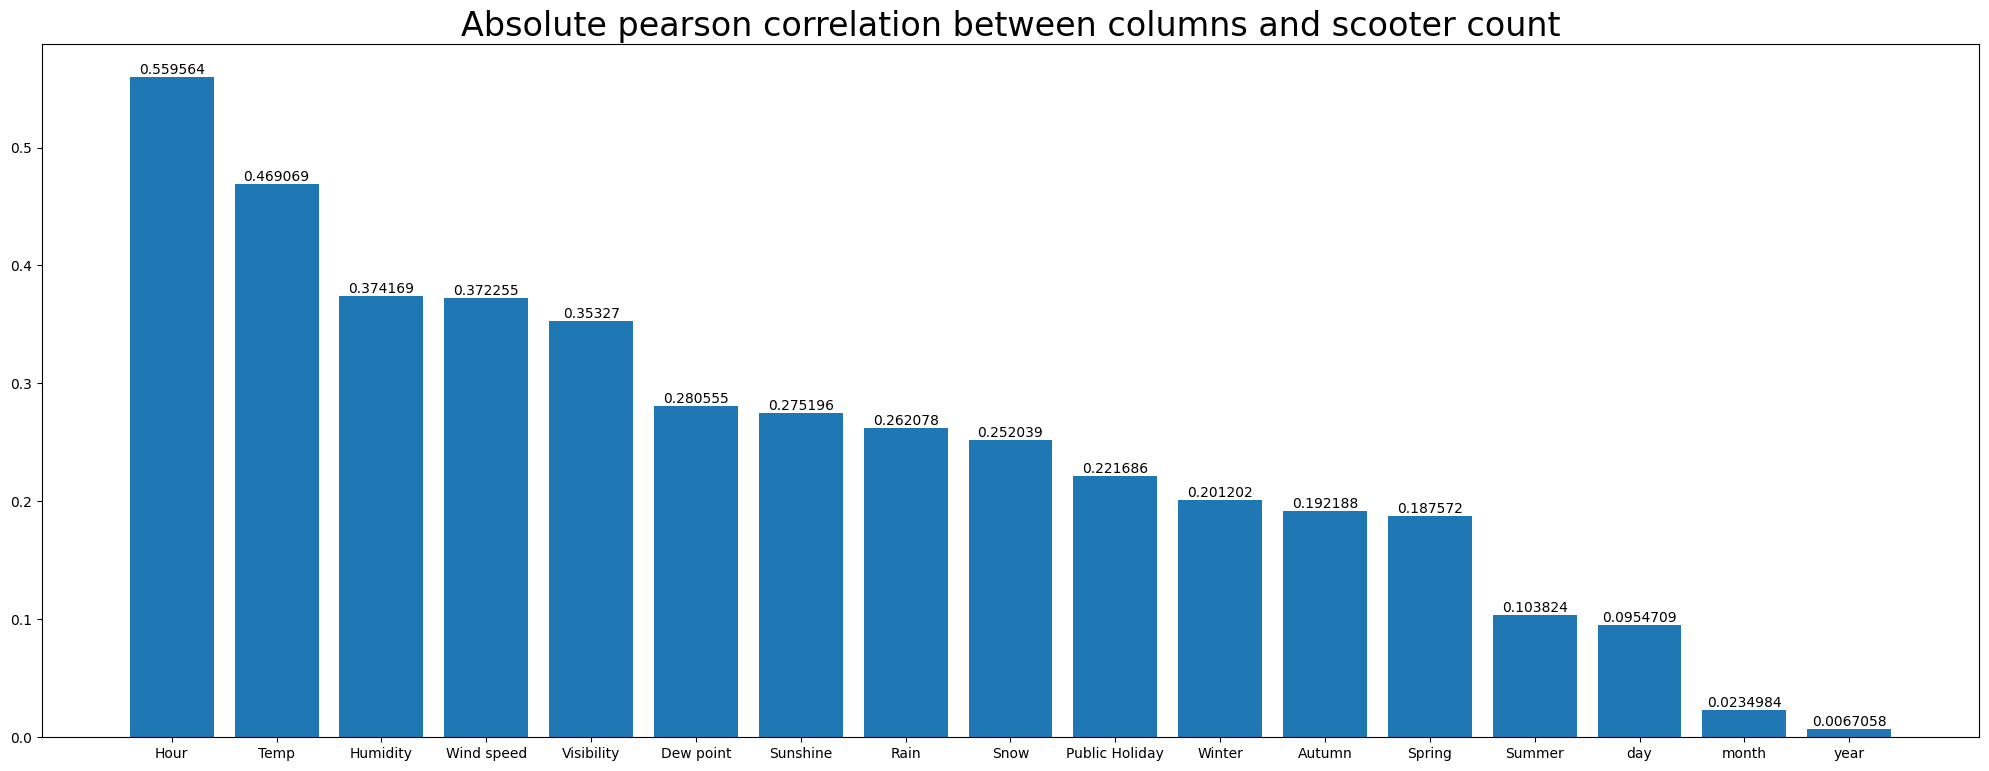

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(25, 9))
ax.bar_label(
    ax.bar(
        data_when_available.drop("Count", axis=1).columns,
        data_when_available.corr("pearson")["Count"]
        .drop("Count")
        .abs()
        .sort_values(ascending=False),
    )
)
_ = ax.set_title(
    "Absolute pearson correlation between columns and scooter count", fontsize=24
)

It is clear that the hour and air temperature have the strongest correlation with the number of rentals.
This plot suggests possible design choices for individuals in the next section. While the size of the individuals in a neural network representation may not differ significantly with less "important" columns (i.e. with more input neurons), a tree-based genetic programming approach can benefit significantly from a reduced number of branches. In that case, a technique like PCA could be used to extract the most informative features from the data while keeping the trees as narrow as possible.

# Neural network approach - investigating the best network shape

It may be beneficial to look at the performance of a neural network trained the conventional way to get an idea of the possible performance of one trained using a genetic algorithm

Split data into a "training" and testing set - the training set will be used to evaluate the fitness of the individuals during the evolution process and the testing portion will be used to evaluate the best individual's performance on unseen data

In [11]:
from sklearn.model_selection import train_test_split

X, y = data_when_available.drop("Count", axis=1), data_when_available["Count"]
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.8,
    random_state=222,  # for repeatable results
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6772, 17), (1693, 17), (6772,), (1693,))

One hidden layer

In [12]:
import torch

X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor = (
    torch.from_numpy(np.float32(X_train)),
    torch.from_numpy(np.float32(X_test)),
    torch.from_numpy(np.float32(y_train)).unsqueeze(1),
    torch.from_numpy(np.float32(y_test)).unsqueeze(1),
)

model_1_h_l = torch.nn.Sequential(
    torch.nn.Linear(X.shape[1], 256, bias=False),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 1, bias=False),
    torch.nn.ReLU(),  # The number of rentals can never go below zero, prevent the model from outputting negative numbers
)

optim = torch.optim.Adam(model_1_h_l.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()
num_epochs = 4000

for epoch in range(num_epochs + 1):
    # Pass training data through model
    y_predict = model_1_h_l(X_train_tensor)
    # Compute BCE loss
    loss = criterion(y_predict, y_train_tensor)
    # Backward pass and gradient step
    optim.zero_grad()
    loss.backward()
    optim.step()
    if not epoch % 1000:
        # Print out the loss every 200 iterations
        print("epoch {}, loss {}".format(epoch, loss.item()))

epoch 0, loss 34.784141540527344
epoch 1000, loss 0.3394469618797302
epoch 2000, loss 0.2321053445339203
epoch 3000, loss 0.17828024923801422
epoch 4000, loss 0.17177075147628784


In [13]:
from sklearn.metrics import r2_score

preds = model_1_h_l(X_test_tensor)

print(
    rf"The R^2 score of the 1 hidden layer model on the unseen dataset is {r2_score(preds.tolist(), y_test_tensor.tolist())}"
)

The R^2 score of the 1 hidden layer model on the unseen dataset is 0.8092599629887114


Two hidden layers

In [14]:
model_2_h_l = torch.nn.Sequential(
    torch.nn.Linear(X_train.shape[1], 128, bias=False),
    torch.nn.ReLU(),
    torch.nn.Linear(128, 32, bias=False),
    torch.nn.ReLU(),
    torch.nn.Linear(32, 1, bias=False),
    torch.nn.ReLU(),
)

optim = torch.optim.Adam(model_2_h_l.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()
num_epochs = 4000

for epoch in range(num_epochs + 1):
    # Pass training data through model
    y_predict = model_2_h_l(X_train_tensor)
    # Compute BCE loss
    loss = criterion(y_predict, y_train_tensor)
    # Backward pass and gradient step
    optim.zero_grad()
    loss.backward()
    optim.step()
    if not epoch % 1000:
        # Print out the loss every 200 iterations
        print("epoch {}, loss {}".format(epoch, loss.item()))

epoch 0, loss 38.12623596191406
epoch 1000, loss 0.3446076512336731
epoch 2000, loss 0.23835112154483795
epoch 3000, loss 0.17630763351917267
epoch 4000, loss 0.18456809222698212


In [15]:
preds = model_2_h_l(X_test_tensor)

print(
    f"The R^2 score of the 2 hidden layer model on the unseen dataset is {r2_score(preds.tolist(), y_test_tensor.tolist())}"
)

The R^2 score of the 2 hidden layer model on the unseen dataset is 0.7953734254247484


From these experiments, it is evident that even a single hidden layer is capable of representing the data well. The value of the $r^2$ score suggests that the model is able to explain a significant portion of the variance in the dataset.
This suggests that evolving a neural network is a good choice for this problem, with a single hidden layer resulting in relatively small individuals.
Furthermore, the processing done above reduces the search space as the model is able to make predictions with smaller weights.

# Evolutionary algorithm

## Individuals and fitnesses


To avoid keeping an entire population of networks in memory, there will only exist a single neural network. 
The individuals will be represented by lists of floating-point numbers, with the length of the list matching the number of parameters in the network.

To evaluate an individual, its "genome" will be reshaped to fit the structure of the network. The individual's fitness will be the model's mean squared error on the dataset.

In [16]:
from collections import OrderedDict

HIDDEN_LAYER_SIZE = 256  # The number of hidden neurons used in the experiment above
MODEL = torch.nn.Sequential(
    OrderedDict(
        [
            ("fc1", torch.nn.Linear(X.shape[1], HIDDEN_LAYER_SIZE, bias=False)),
            ("relu1", torch.nn.ReLU()),
            ("fc2", torch.nn.Linear(HIDDEN_LAYER_SIZE, 1, bias=False)),
            ("relu2", torch.nn.ReLU()),
        ]
    )
)
IND_SIZE = len(torch.flatten(MODEL.fc1.weight)) + len(torch.flatten(MODEL.fc2.weight))
layer_1_size, layer_2_size = (
    len(torch.flatten(MODEL.fc1.weight)),
    len(torch.flatten(MODEL.fc2.weight)),
)
print(
    f"Each individual consists of {IND_SIZE} numbers representing the model weights, of which {layer_1_size} represent the 1st layer and {layer_2_size} the second"
)

Each individual consists of 4608 numbers representing the model weights, of which 4352 represent the 1st layer and 256 the second


Some simple tests of setting the model with an individual's weights

In [17]:
test_zeros = list(
    np.zeros(IND_SIZE)
)  # Based on experience from the practicals, it's better to keep individuals as lists as opposed to numpy arrays
test_ones = list(np.ones(IND_SIZE))
test_ones_and_zeros = list(
    np.concatenate((np.zeros(layer_1_size), np.ones(layer_2_size)))
)  # This should set all layer 1 weights to zeros and layer 2 weights to ones


def set_weights(individual):
    """
    Set the weights of the singleton model to the genes of the given individual
    :param individual: a list of size IND_SIZE
    """
    with torch.no_grad():
        MODEL.fc1.weight.data = torch.from_numpy(
            np.float32(individual[0:layer_1_size]).reshape(
                (HIDDEN_LAYER_SIZE, X.shape[1])
            )
        )
        MODEL.fc2.weight.data = torch.from_numpy(
            np.float32(individual[layer_1_size : layer_1_size + layer_2_size]).reshape(
                (1, HIDDEN_LAYER_SIZE)
            )
        )


set_weights(test_ones_and_zeros)
assert (
    torch.sum(MODEL.fc1.weight) == 0 and torch.sum(MODEL.fc2.weight) == layer_2_size
)  # Test the reshaping works correctly: first layer is all zeros and second layer is all ones

Evaluating the fitness of an individual - using the mean squared error as the metric

In [18]:
mse = torch.nn.MSELoss()


def evaluate(individual):
    with torch.no_grad():
        set_weights(individual)
        preds = MODEL(X_train_tensor)
    return (
        mse(preds, y_train_tensor).item(),
    )  # DEAP requires the use of tuples in the fitness


print(evaluate(test_ones), evaluate(test_zeros))

(2633444.0,) (38.39167785644531,)


## The algorithm

The code below will populate a DEAP toolbox with the necessary functions to keep track and describe the success of a population of individuals.

To create a new individual, a list of size IND_SIZE will be populated with numbers sampled from a uniform distribution between -1 and 1. This allows the networks to be initialised with smaller weights and is a strategy commonly used in more conventional machine learning scenarios.

Given that the fitness of an individual is given by its mean squared error, the objective of the evolutionary algorithm is the minimisation of the individuals' fitnesses. For this, the weight of the fitness will be set to -1.

It should be noted that evolving a neural network is unlikely to benefit from crossover: changing the weights in such a drastic way can significantly affect the performance of the new individuals and lead to an unstable training curve. Instead, each individual in the population will mutate, allowing for more gradual changes in their genome.
It is also for this reason that a simple 1-dimensional list is sufficient to represent the individuals - a nested structure (e.g. a sublist per layer) will provide little benefit and will make the representation more complex.

Given the size of the individual and the network's sensitivity to changes in weights, the rate of mutation is likely to stay relatively low.

The best individuals will be entered in a hall of fame, which will be used to retrieve the best ever recorded individual after the training is complete. This allows the algorithm to be more resilient to mutation negatively affecting the individuals' performance as the best genome will not be lost.

In [23]:
from deap import base, creator, tools

import random

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.gauss, -1.0, 1.0)
toolbox.register(
    "individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=IND_SIZE
)
toolbox.register("evaluate", evaluate)
toolbox.register("select", tools.selTournament, tournsize=25)

toolbox.register("mutate", tools.mutGaussian, mu=0.0, sigma=0.5, indpb=0.003)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)
display_logbook = (
    tools.Logbook()
)  # Logbook for displaying the scores as training happens - at a reduced rate
plotting_logbook = (
    tools.Logbook()
)  # Logbook for visualising curves - records every single generation

pop = toolbox.population(n=250)
hof = tools.HallOfFame(1)

# Evaluate the fitness of the population prior to running the main algorithm
fitnesses = [toolbox.evaluate(indiv) for indiv in pop]
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit

/Users/ivanbar/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/ivanbar/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


## Running the algorithm

In [24]:
NGEN = 900
display_logbook.header = "gen", "avg", "std", "min", "max"
plotting_logbook.header = "gen", "avg", "std", "min", "max"
for g in range(NGEN):
    offspring = toolbox.select(pop, len(pop))
    offspring = list(map(toolbox.clone, offspring))

    for mutant in offspring:
        toolbox.mutate(mutant)
        del mutant.fitness.values

    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = [toolbox.evaluate(indiv) for indiv in invalid_ind]
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    pop[:] = offspring
    record = stats.compile(pop)
    hof.update(pop)
    plotting_logbook.record(gen=g, **record)
    if not g % 50:  # Display logbook every 50 epochs to avoid bloating the PDF
        display_logbook.record(gen=g, **record)
        print(display_logbook.stream)

gen	avg    	std    	min    	max    
0  	35.3457	2.60997	24.7017	38.2269
50 	1.27246	0.0656164	1.24038	1.95637
100	0.843936	0.0829839	0.827794	1.97063
150	0.63901 	0.0635885	0.622493	1.16751
200	0.567189	0.0699092	0.54688 	1.13227
250	0.5161  	0.0342443	0.506617	0.828683
300	0.500868	0.115083 	0.482835	2.02794 
350	0.485812	0.0689627	0.468361	1.1537  
400	0.465132	0.0436155	0.452475	0.883984
450	0.541549	1.3567   	0.436244	21.8659 
500	0.447641	0.119042 	0.422767	1.70494 
550	0.425796	0.043036 	0.412687	0.73959 
600	0.408536	0.0333326	0.398737	0.699356
650	0.401459	0.0684097	0.386825	1.12045 
700	0.391604	0.0446354	0.37855 	0.797874
750	0.408231	0.506005 	0.359584	8.27783 
800	0.442872	1.4      	0.343707	22.5286 
850	0.353819	0.0653778	0.336611	1.02437 


Text(0.5, 1.0, 'Best individual (lowest fitness) per epoch')

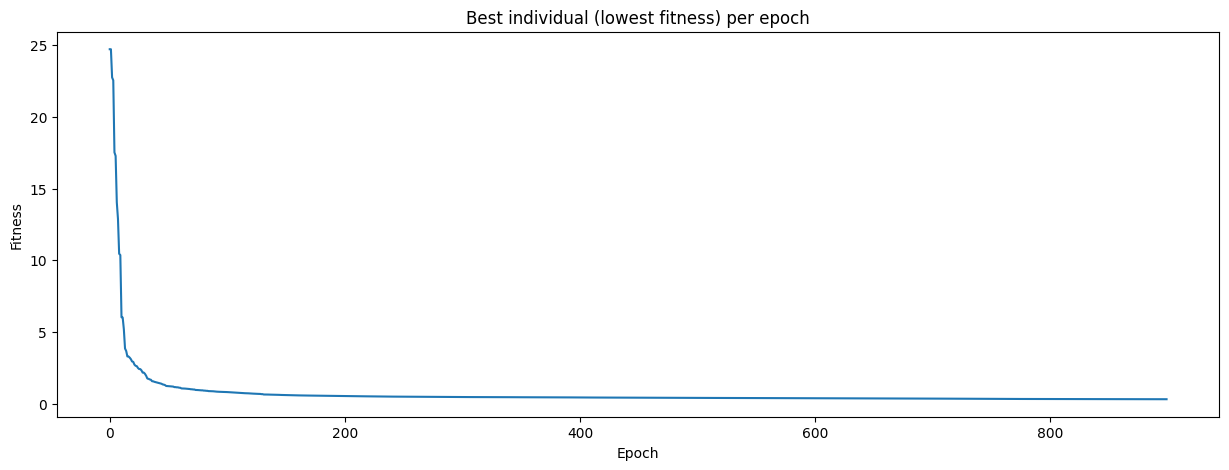

In [25]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(plotting_logbook.select("min"))
ax.set_xlabel("Epoch")
ax.set_ylabel("Fitness")
ax.set_title("Best individual (lowest fitness) per epoch")

It is clear that the performance of the indivuduals is consistently improving: the plot above shows the minimum fitness (i.e. the mean squared error on the training set) across the epochs.
The best individuals have been tracked by the `hof` variable, which allows accessing the best individual to have ever been recorded.

To evaluate the best individual on unseen data, the below cell will calculate the $r^2$ score of the individual on the portion of the original data held back for testing

In [29]:
best_ind = hof.items[0]
set_weights(best_ind)
print(f"The best individual' fitness is {best_ind.fitness.values[0]}")
with torch.no_grad():
    preds = MODEL(X_test_tensor)
    print(
        f"The individual's r^2 score on an unseen portion of the dataset is {r2_score(y_test_tensor.tolist(), preds.tolist())}"
    )

The best individual' fitness is 0.3309374749660492
The individual's r^2 score on an unseen portion of the dataset is 0.7522031183343036


This score suggests that the evolved network is able to explain about 75% of the variance of the count of scooters.
While not a perfect fit to the data, this result is close to the score obtained via "conventional" training, suggesting that the evolutionary algorithm is capable of achieving similar quality results.
Another useful metric can be the mean absolute error on the testing dataset. This will allow us to see the performance of the network in the context of its target i.e. to see the mean number of scooters it is wrong by.

In [30]:
from sklearn.metrics import mean_absolute_error

preds_exponent = np.round(
    np.exp(preds)
)  # Having fractions of a scooter rented on a given day is impossible, convert to the nearest integer
actual_exponent = np.round(np.exp(y_test))
best_ind_mae = mean_absolute_error(actual_exponent, preds_exponent)
print(best_ind_mae)

242.31659775546368


On average, the trained network is mistaken by 253 scooters. To see how this may affect the model in the "real world", it may be useful to plot the distribution of scooter counts.

In [31]:
preds_nn = model_1_h_l(X_test_tensor)
mae_nn = torch.nn.L1Loss()(torch.exp(preds_nn), torch.exp(y_test_tensor))

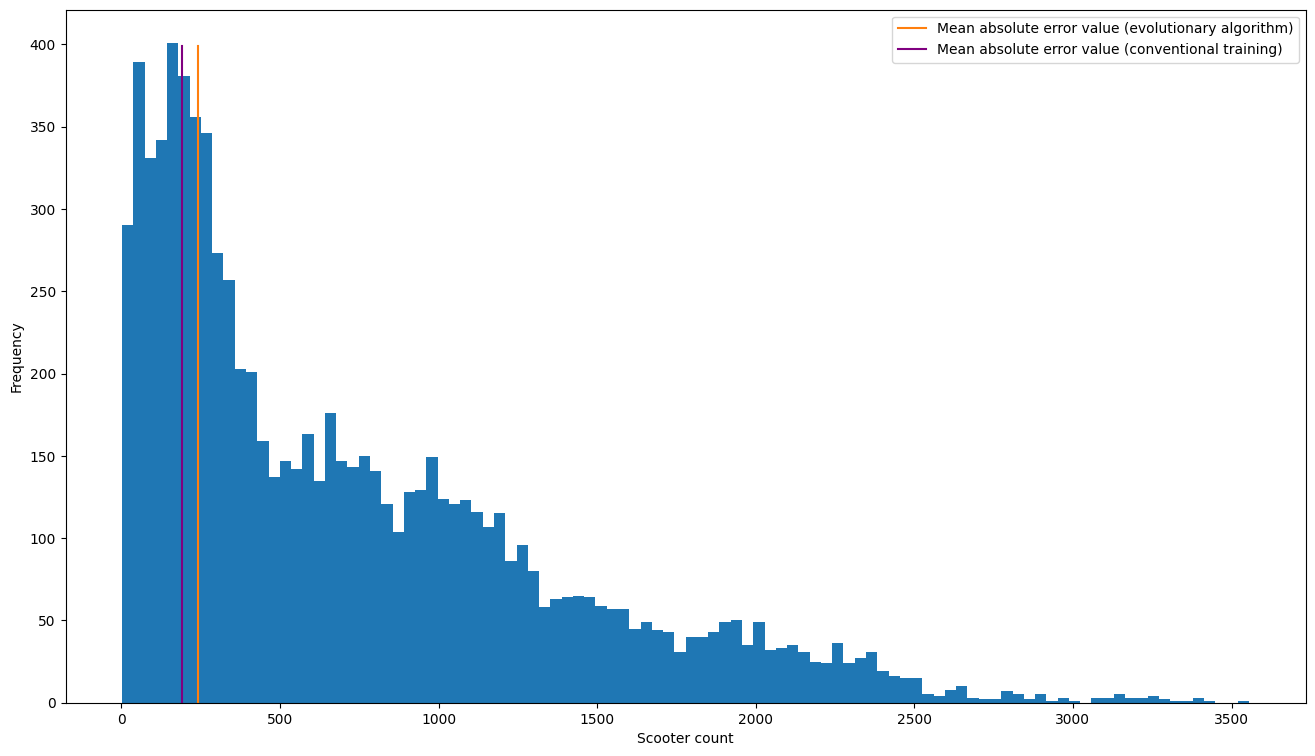

In [32]:
_, ax = plt.subplots(figsize=(16, 9))
_ = ax.hist(np.exp(data_when_available["Count"]), bins=100)
_ = ax.set_xlabel("Scooter count")
_ = ax.set_ylabel("Frequency")
_ = ax.plot(
    [best_ind_mae] * 400,
    range(400),
    label="Mean absolute error value (evolutionary algorithm)",
)
_ = ax.plot(
    [mae_nn.item()] * 400,
    range(400),
    label="Mean absolute error value (conventional training)",
    color="purple",
)
_ = ax.legend()

The above plot shows that the model's error is greater than a large number of observations in the dataset. Despite that, the mean absolute error is close to that of the conventionally trained network.

While the results obtained in these experiments are not perfect, it is evident that the evolutionary approach is a powerful tool for evolving neural networks.

It can also be informative to look at the best individual's distribution of errors on the testing dataset as well as the median error

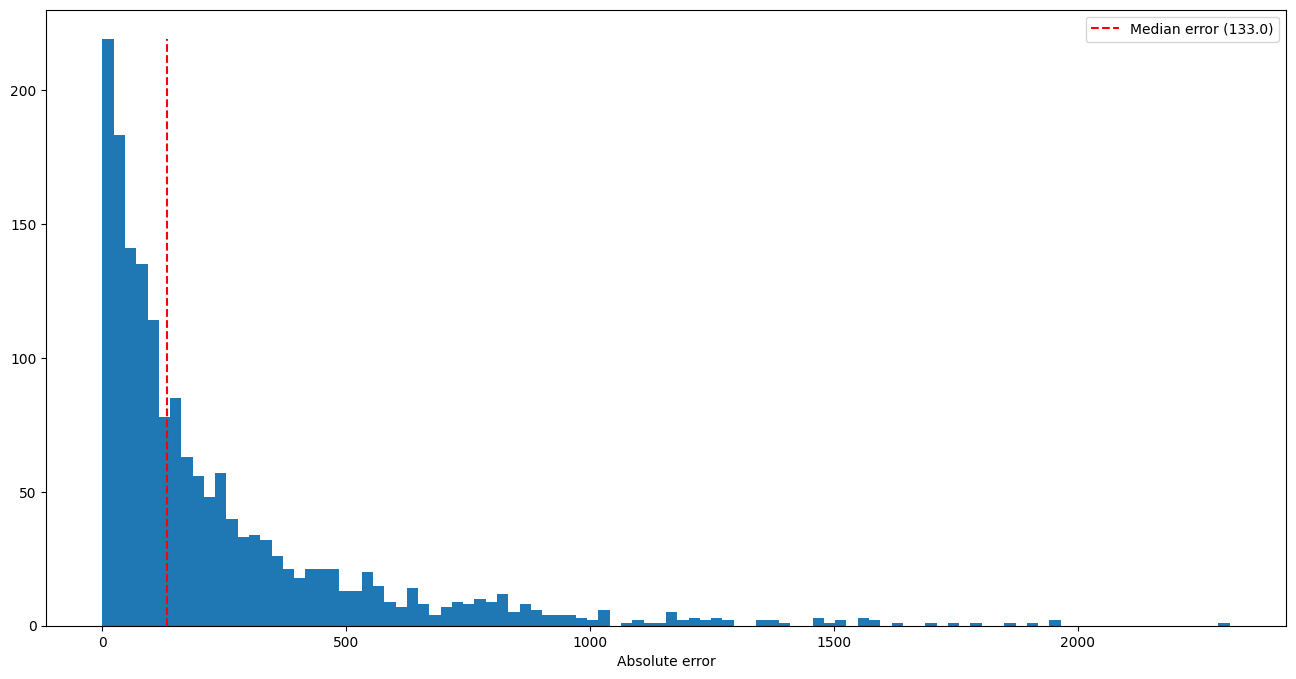

In [73]:
set_weights(best_ind)
with torch.no_grad():
    preds = MODEL(X_test_tensor)
preds_exponent = torch.round(torch.exp(preds))
actual_exponent = torch.round(torch.exp(y_test_tensor))
diffs = torch.abs(preds_exponent - actual_exponent)
diffs = diffs.squeeze().tolist()
median_diff = np.median(diffs)

_, ax = plt.subplots(figsize=(16, 8))
ax.hist(diffs, bins=100)
ax.plot(
    [median_diff] * 220,
    range(220),
    label=f"Median error ({median_diff})",
    color="red",
    linestyle="--",
)
ax.set_xlabel("Absolute error")
_ = ax.legend()

It is evident that the testing dataset contains several outliers which are driving up the mean error. This explains the difference between the mean and the median errors.

# Conclusion

Overall, it is clear that the evolutionary algorithm was able to produce a consistently improving population which, when fitted to a neural network, is able to closely match the results gained via common backpropagation algorithms.
The size of the network was kept relatively small, with the mean absolute error remaining an area of improvement should the model be used for any critical tasks. Despite that, it is commonly believed that larger (that is, wider, deeper or a combination of both) networks are able to fit the data better.
Care must be taken when training a larger network, especially that with a deeper architecture, as the size of each individual will grow at an exponential rate, leading to an increased memory and computational cost.

A future improvement to the algorithm could be seen in evolving the architecture of the network itself along with hte weights, in an algorithm such as NEAT. This, however, goes beyond the capabilities offered by DEAP.
The results presented here can therefore be seen as a "proof of concept" and a display of the capabilities of evolutionary algorithms.

In [229]:
from sklearn.model_selection import train_test_split

X, y = data_when_available.drop("Count", axis=1), data_when_available["Count"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.9
)  # Train on the vast majority of data but leave a bit for testing the best individual

In [230]:
from sklearn.decomposition import PCA

pca = PCA()

X_pcs = pca.fit_transform(X)
X_pcs = X_pcs[:, 0:12]
X_train, X_test, y_train, y_test = train_test_split(
    X_pcs, y, train_size=0.9
)  # Train on the vast majority of data but leave a bit for testing the best individual

In [296]:
from deap import base, creator, tools, gp
from operator import mul, add, sub, attrgetter, neg
from math import log, cos, sin, sqrt

pset = gp.PrimitiveSet("main", X_train.shape[1])

pset.addPrimitive(mul, 2)
pset.addPrimitive(add, 2)
pset.addEphemeralConstant("randFloat", random.random)
pset.addPrimitive(sub, 2)
pset.addPrimitive(neg, 1)
# pset.addPrimitive(pow, 2)
pset.addPrimitive(log, 1)
pset.addPrimitive(cos, 1)
pset.addPrimitive(sin, 1)
pset.addPrimitive(sqrt, 1)
pset.addPrimitive(abs, 1)

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)
toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=3, max_=10)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)
toolbox.register(
    "select",
    tools.selDoubleTournament,
    fitness_size=150,
    parsimony_size=1.4,
    fitness_first=True,
)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=3, max_=5)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

toolbox.decorate("mate", gp.staticLimit(key=attrgetter("height"), max_value=15))
toolbox.decorate("mutate", gp.staticLimit(key=attrgetter("height"), max_value=15))

pset.renameArguments(
    **dict(
        [
            (f"ARG{index}", column.lower().replace(" ", "_"))
            for (index, column) in enumerate(X.columns)
        ]
    )
)

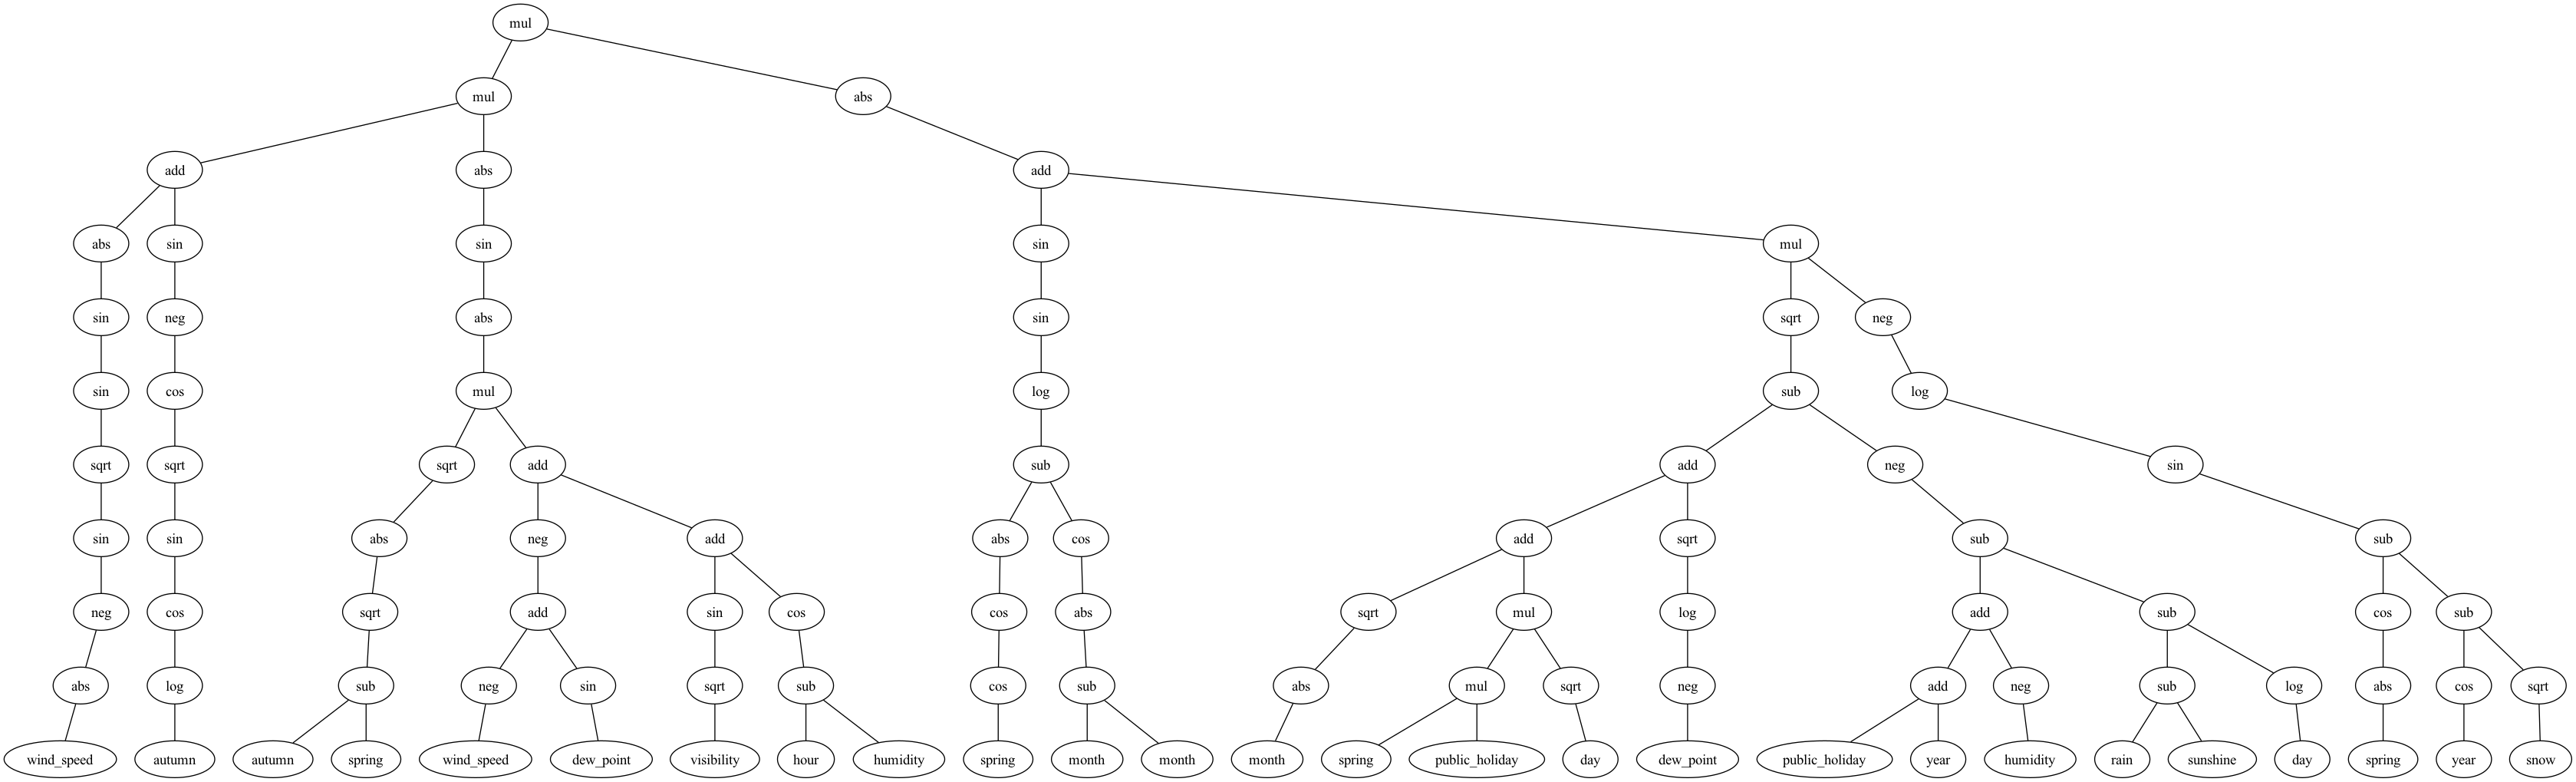

In [297]:
import pygraphviz as pgv
from IPython.display import Image

ind = toolbox.individual()

nodes, edges, labels = gp.graph(ind)
tree = pgv.AGraph()
tree.add_nodes_from(nodes)
tree.add_edges_from(edges)
tree.layout(prog="dot")

for i in nodes:
    n = tree.get_node(i)
    n.attr["label"] = labels[i]

treePlot = tree.draw(format="png", prog="dot")
Image(treePlot)

In [298]:
from sklearn.metrics import mean_squared_error
import numpy as np


def evaluate_mse(individual, test_inputs, test_values):
    func = toolbox.compile(expr=individual)
    try:
        fitness = mean_squared_error(
            test_values, [func(*list(row)) for row in np.array(test_inputs)]
        )
    except:  # noqa E722
        return (1000000000,)
    return (fitness,)


toolbox.register("evaluate", evaluate_mse, test_inputs=X_train, test_values=y_train)

In [299]:
stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
stats_size = tools.Statistics(len)
mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
mstats.register("avg", np.mean)
mstats.register("std", np.std)
mstats.register("min", np.min)
mstats.register("max", np.max)

In [300]:
from deap import algorithms

pop = toolbox.population(n=500)
hof = tools.HallOfFame(1)

pop, log = algorithms.eaSimple(
    pop,
    toolbox,
    cxpb=0.5,
    mutpb=0.4,
    ngen=150,
    stats=mstats,
    halloffame=hof,
    verbose=True,
)

   	      	                      fitness                      	                      size                     
   	      	---------------------------------------------------	-----------------------------------------------
gen	nevals	avg    	gen	max  	min    	nevals	std        	avg   	gen	max	min	nevals	std    
0  	500   	5.9e+08	0  	1e+09	18.9964	500   	4.91833e+08	18.228	0  	185	4  	500   	24.4589
1  	329   	2.2e+08	1  	1e+09	9.64652	329   	4.14246e+08	11.362	1  	40 	2  	329   	5.82915
2  	338   	2.22e+08	2  	1e+09	4.91175	338   	4.15591e+08	16.852	2  	56 	4  	338   	8.27515
3  	346   	2.22e+08	3  	1e+09	1.03361	346   	4.15591e+08	26.354	3  	71 	4  	346   	9.53964
4  	359   	2.08e+08	4  	1e+09	0.931392	359   	4.05877e+08	36.272	4  	75 	4  	359   	10.5712
5  	351   	2.5e+08 	5  	1e+09	0.914165	351   	4.33013e+08	43.744	5  	92 	5  	351   	11.6283
6  	346   	2.4e+08 	6  	1e+09	0.884492	346   	4.27083e+08	45.728	6  	85 	5  	346   	11.496 
7  	348   	2.28e+08	7  	1e+09	0.84246 	348   	4.19

Text(0, 0.5, 'Fitness')

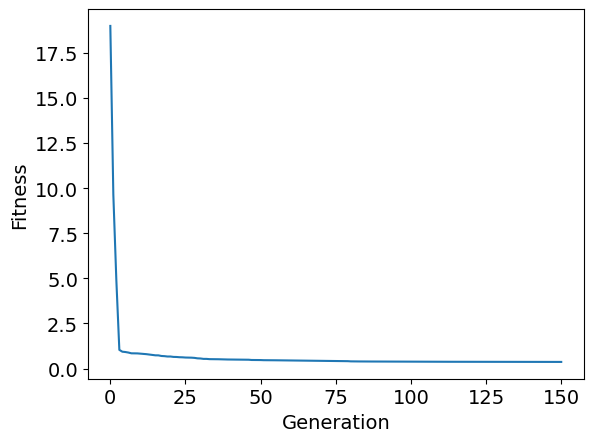

In [301]:
import matplotlib.pyplot as plt

gen = log.chapters["fitness"].select("gen")
_min = log.chapters["fitness"].select("min")
_max = log.chapters["fitness"].select("max")
avgs = log.chapters["fitness"].select("avg")
stds = log.chapters["fitness"].select("std")
plt.rc("axes", labelsize=14)
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("legend", fontsize=14)

fig, ax1 = plt.subplots()
line1 = ax1.plot(gen, _min)
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness")

In [302]:
indv = hof.items[0]
print(indv)

add(add(add(sub(cos(abs(sqrt(sqrt(sqrt(rain))))), sub(mul(neg(sin(abs(abs(sqrt(sqrt(sqrt(sunshine))))))), cos(add(log(sin(abs(sub(spring, 0.16672583443938327)))), neg(sin(sub(sqrt(sqrt(sin(rain))), cos(year))))))), sub(sqrt(abs(sub(sqrt(add(sub(abs(abs(add(hour, rain))), rain), sub(abs(abs(add(hour, rain))), rain))), mul(sqrt(add(sin(sin(0.22876257101640607)), sub(add(cos(hour), sunshine), neg(sin(0.22876257101640607))))), add(cos(abs(hour)), add(log(0.22876257101640607), cos(hour))))))), sqrt(sqrt(sqrt(sin(rain))))))), sub(add(abs(summer), sqrt(sqrt(add(abs(sqrt(sqrt(sqrt(sqrt(sqrt(add(spring, sunshine))))))), sub(cos(add(cos(hour), sunshine)), neg(spring)))))), sub(neg(add(autumn, 0.22876257101640607)), sqrt(sqrt(sub(cos(humidity), neg(spring))))))), sub(temp, sqrt(abs(sqrt(sqrt(rain)))))), cos(neg(add(sub(cos(sin(sqrt(sin(sin(mul(humidity, hour)))))), add(cos(add(hour, add(log(0.22876257101640607), neg(sub(mul(visibility, hour), cos(temp)))))), sub(humidity, mul(mul(mul(sub(cos(sqrt

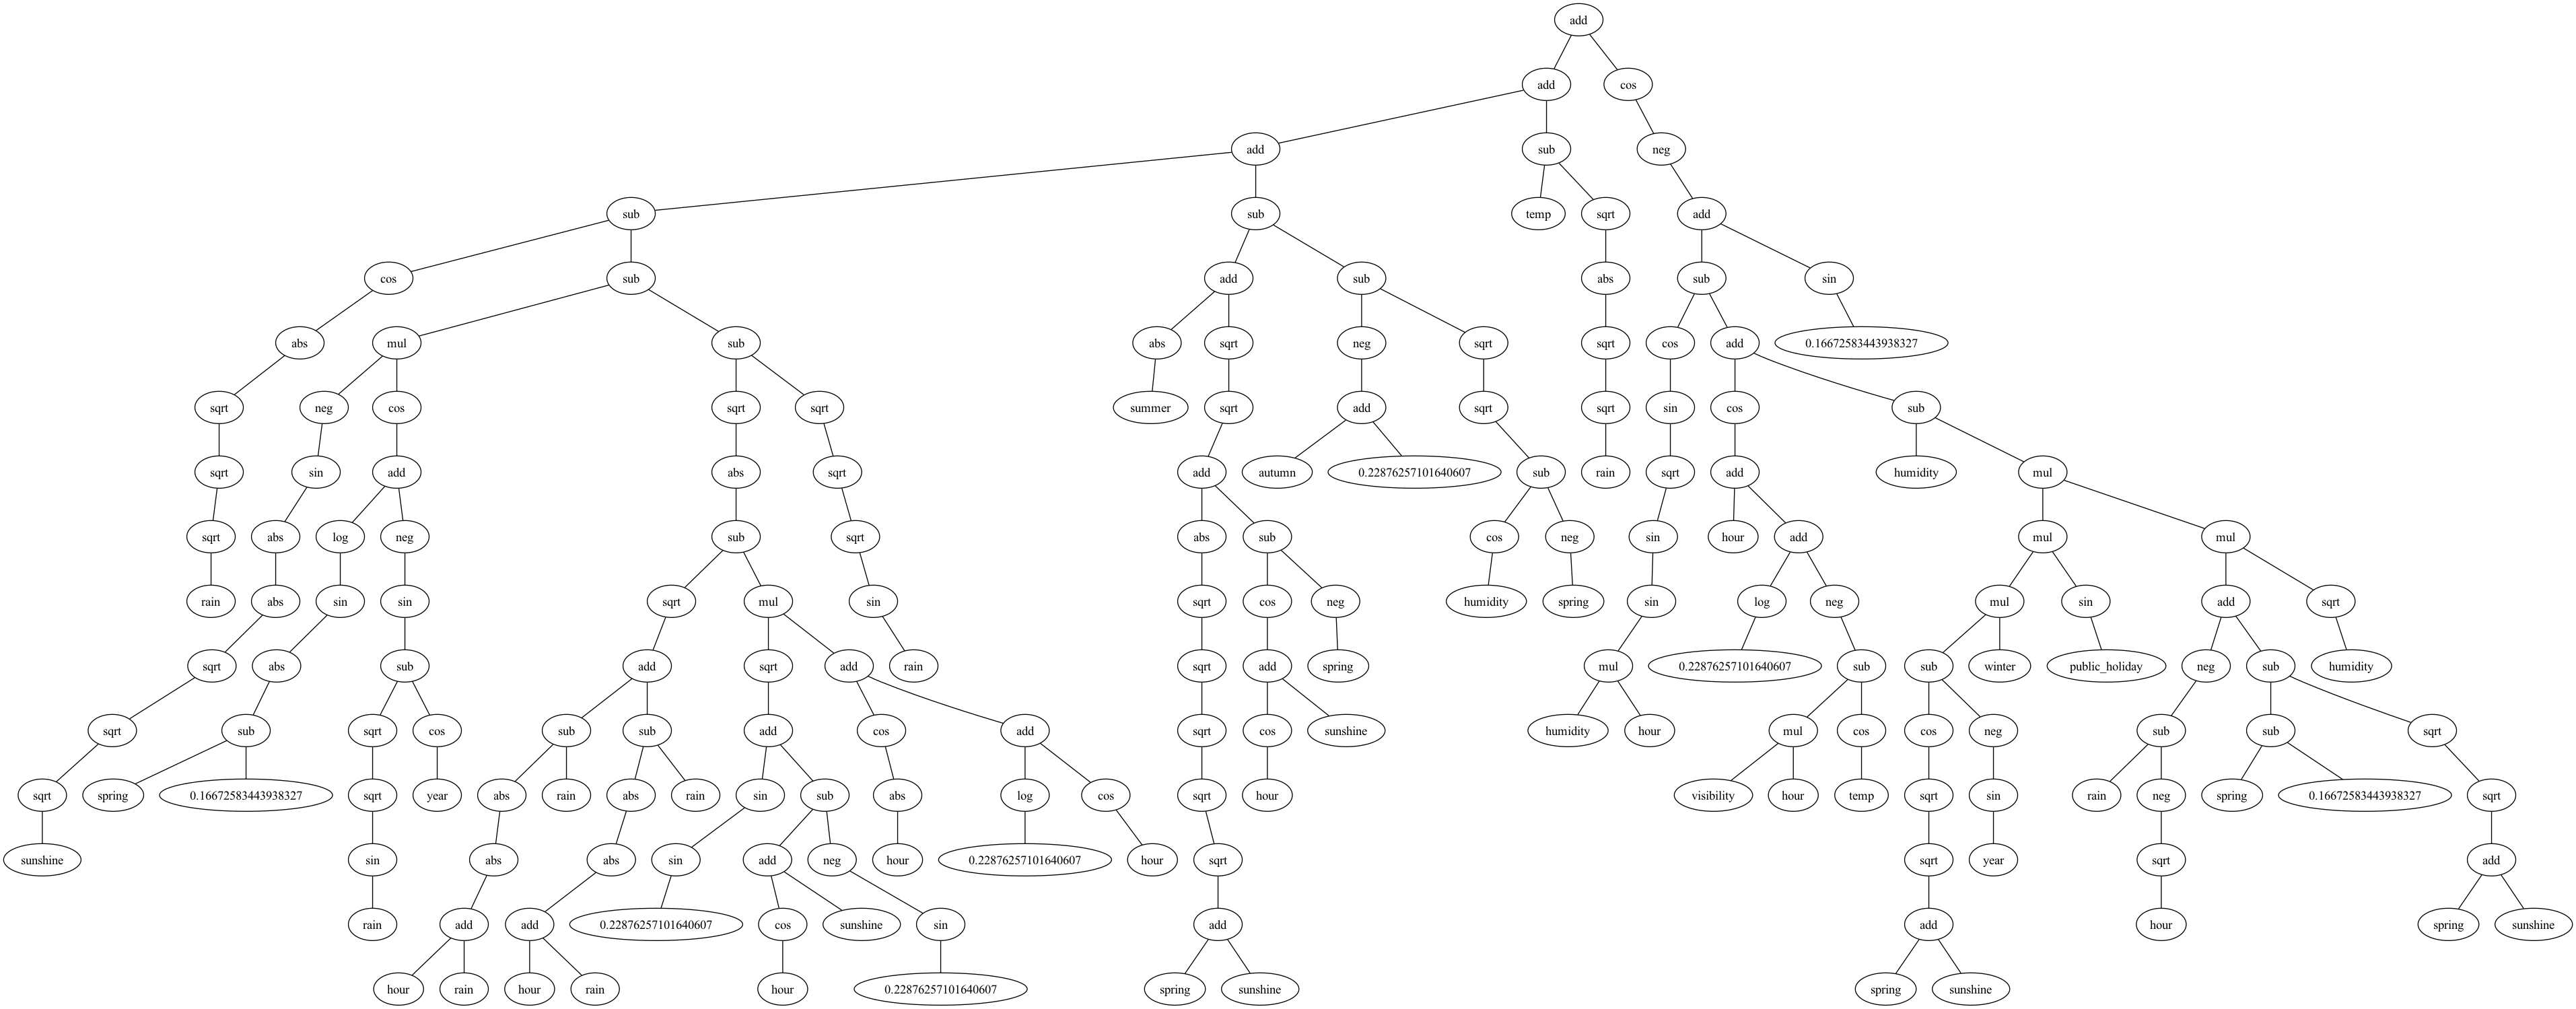

In [303]:
nodes, edges, labels = gp.graph(indv)

tree = pgv.AGraph()
tree.add_nodes_from(nodes)
tree.add_edges_from(edges)
tree.layout(prog="dot")

for i in nodes:
    n = tree.get_node(i)
    n.attr["label"] = labels[i]

treePlot = tree.draw(format="png", prog="dot")
Image(treePlot)

In [306]:
from sklearn.metrics import r2_score, mean_absolute_error

preds = [toolbox.compile(indv)(*list(row)) for row in np.array(X_test)]

print(r2_score(y_test, preds))
print(mean_absolute_error(np.round(np.exp(y_test)), np.round(np.exp(preds))))

0.7305865659803832
166535.36798582398
